# Random Forest on Diabetes Dataset:

In [1]:
# necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading iris dataset
from sklearn.datasets import load_iris

# data splitting
from sklearn.model_selection import train_test_split

# ensemble method-RandomForest
from sklearn.ensemble import RandomForestClassifier

# accuracy metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# loading data
diabetes = pd.read_csv('./kaggle/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.shape

(768, 9)

In [5]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
y = diabetes['Outcome']

In [7]:
y.shape

(768,)

In [8]:
X = diabetes.drop('Outcome',axis=1)
print(X.shape)
X

(768, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# creating instance
clf_diab = RandomForestClassifier(n_estimators=60)
clf_diab.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60)

In [12]:
diab_pred = clf_diab.predict(X_test)

In [13]:
# just to comapre our prediction is similar to y_test
pd.DataFrame([diab_pred,y_test])

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
0,0,1,0,1,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,0,1,0,1,1,1,1,1,1,0,...,1,1,0,1,0,1,1,0,0,1


# Accuracy Checking

In [14]:
accuracy_score(y_test, diab_pred)

0.7857142857142857

In [15]:
confusion_matrix(y_test, diab_pred)

array([[83,  8],
       [25, 38]])

In [16]:
print(classification_report(y_test, diab_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        91
           1       0.83      0.60      0.70        63

    accuracy                           0.79       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.79      0.79      0.78       154



# Feature Importance

In [17]:
clf_diab.feature_importances_

array([0.09008044, 0.24584788, 0.0877464 , 0.06739844, 0.0816062 ,
       0.16790599, 0.12903993, 0.13037472])

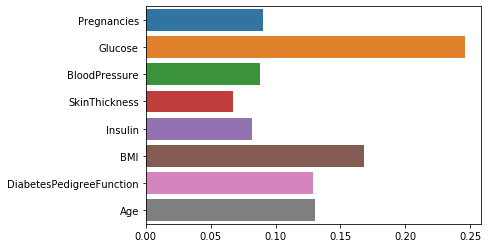

In [18]:
sns.barplot(x=clf_diab.feature_importances_, y=X.columns)

**The best features that are inclined towards the prediction are:Glucose,
Age,
BMI,
DiabetesPedigreeFunction,
BloodPressure,Insulin 
These factors will affect the predicting the model more accurately.**

**The model obtained from random forest is effective in predicting even when a portion of data is missing..though this dataset has nothing null or missing information from columns**


*---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------*

# Random Forest on Iris Dataset

In [19]:
iris = load_iris()
# concating target and features together in a dataframe
d = pd.DataFrame(np.c_[iris['data'],iris['target']], columns=iris['feature_names']+['target'])
d.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [20]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [22]:
X = d.iloc[:,:4]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
y = d.iloc[:,4]
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
# creating instance
clf = RandomForestClassifier(n_estimators=40)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [26]:
prediction = clf.predict(X_test)

In [27]:
y_test

149    2.0
37     0.0
136    2.0
145    2.0
17     0.0
89     1.0
109    2.0
124    2.0
112    2.0
93     1.0
138    2.0
82     1.0
80     1.0
148    2.0
81     1.0
144    2.0
123    2.0
40     0.0
141    2.0
48     0.0
86     1.0
74     1.0
23     0.0
110    2.0
102    2.0
133    2.0
65     1.0
13     0.0
69     1.0
134    2.0
Name: target, dtype: float64

# Accuracy checking

In [28]:
# score
accuracy_score(y_test,prediction)

0.9333333333333333

In [29]:
confusion_matrix(y_test, prediction)

array([[ 6,  0,  0],
       [ 0,  9,  0],
       [ 0,  2, 13]])

In [30]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       0.82      1.00      0.90         9
         2.0       1.00      0.87      0.93        15

    accuracy                           0.93        30
   macro avg       0.94      0.96      0.94        30
weighted avg       0.95      0.93      0.93        30



# Feature Importance

In [31]:
clf.feature_importances_

array([0.13605726, 0.03198117, 0.46405557, 0.367906  ])

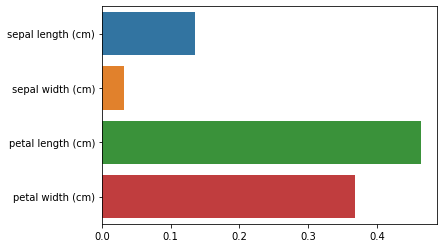

In [32]:
sns.barplot(x=clf.feature_importances_,y=iris.feature_names)

# Generating model on Selected Features

In [33]:
X = d[['petal length (cm)','petal width (cm)','sepal length (cm)']]

In [34]:
X

,petal length (cm),petal width (cm),sepal length (cm)
0,1.4,0.2,5.1
1,1.4,0.2,4.9
2,1.3,0.2,4.7
3,1.5,0.2,4.6
4,1.4,0.2,5.0
...,...,...,...
145,5.2,2.3,6.7
146,5.0,1.9,6.3
147,5.2,2.0,6.5
148,5.4,2.3,6.2


In [35]:
y = d.iloc[:,4]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
clf_ = RandomForestClassifier(n_estimators=40)
clf_.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [44]:
prediction_ = clf_.predict(X_test)

# Accuracy Checking

In [45]:
accuracy_score(y_test, prediction_)

0.9666666666666667

In [46]:
confusion_matrix(y_test, prediction_)

array([[ 9,  0,  0],
       [ 0,  6,  1],
       [ 0,  0, 14]])

In [47]:
print(classification_report(y_test, prediction_))
# an f1-score reaches its best value at 1

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      0.86      0.92         7
         2.0       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.98      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



**Conclusion**:*After knowing which features contribute more to the model, accuracy of the model can be improved by only using those features which appear to make an impact(i.e. not very low value of imprtance)*